### Assignment 4

First import the basic libraries for image processing. 

In [32]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.linalg import inv

#### Initialise and normalise the data

In [33]:
data = loadmat('69dataset.mat')
labels = data['labels']
X = data['X'].astype(float)
Y = data['Y']
X_prior = data['prior'].astype(float)

X_mean, X_std  = np.reshape(np.mean(X,axis=0),(1,784)), np.reshape(np.std(X,axis=0),(1,784))
Y_mean, Y_std = np.reshape(np.mean(Y,axis=0),(1,3092)), np.reshape(np.std(Y,axis=0),(1,3092))
Xp_mean, Xp_std  = np.reshape(np.mean(X_prior,axis=0),(1,784)), np.reshape(np.std(X_prior,axis=0),(1,784))
X_norm = (X - X_mean) / X_std
X_norm[np.isnan(X_norm)] = 0

Y_norm = (Y - Y_mean) / Y_std

X_normp = (X_prior - Xp_mean) / Xp_std
X_normp[np.isnan(X_normp)] = 0


/home/abdullahi/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.
/home/abdullahi/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


#### Exercise 1

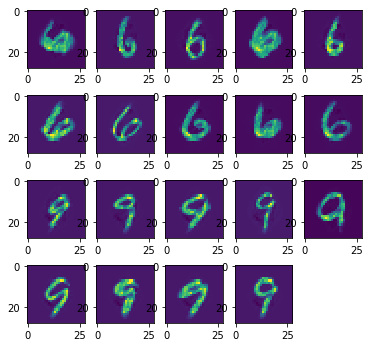

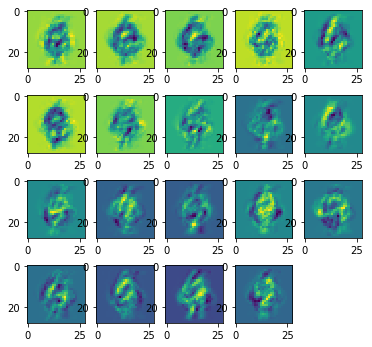

In [34]:
# Excercise 1
I_l = np.mat(10**-6 * np.identity(3092))
B = inv(np.mat(Y_train).T * np.mat(Y_train) + I_l) * np.mat(Y_train).T * np.mat(X_train)

x_test = B.T * Y_test.T
# Reconstruct normalized images
x_test = np.array(x_test).T*X_std + X_mean
X_test = X_test * X_std + X_mean

fig = plt.figure(figsize=(6,6))
# actual images
fig = plt.figure(figsize=(6,6))
for i in range(19):
    image = np.reshape(X_test[i,:],(28,28)).T
    sub = fig.add_subplot(4,5,i+1)
    sub.imshow(image)

# reconstructed images excercise 1
fig = plt.figure(figsize=(6,6))
for i in range(19):
    image = np.reshape(x_test[i,:],(28,28)).T
    sub = fig.add_subplot(4,5,i+1)
    sub.imshow(image)

#### Exercise 2

In [35]:
sigma = np.mat(10**-3 * np.identity(784)) #covariance matrix
I_l = np.mat(10**-6 * np.identity(784))

B = inv(np.mat(X_train).T * np.mat(X_train) + I_l)\
    * np.mat(X_train).T * np.mat(Y_train)
sigma_prior = (np.mat(X_prior).T * np.mat(X_prior)) / (np.shape(X_prior)[0] - 1)
# add regularisation
sigma_prior += np.mat(10**-6*np.identity(784))

#### Visualisation of sigma prior


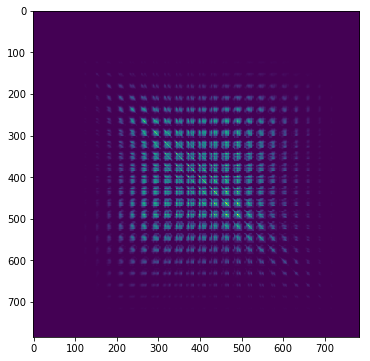

In [36]:
# visualize sigma prior
fig = plt.figure(figsize=(6,6))

plt.imshow(sigma_prior)

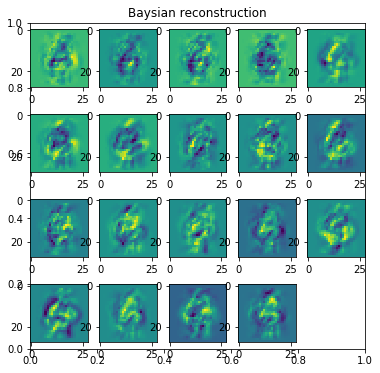

In [37]:
# Excercise 2


B = inv(np.mat(X_train).T*X_train +lI)*np.mat(X_train).T*np.mat(Y_train)
p1 = inv(inv(sigma_prior) + (B.T*inv(sigma)).T*B.T)
mu_post = ((p1*B).T*inv(sigma)).T*np.mat(Y_test).T
mu_post = np.array(mu_post).T*np.std(X) + pixel_mean

fig = plt.figure(figsize=(6,6))
plt.title('Baysian reconstruction')
for i in range(19):
    image = np.reshape(mu_post[i,:],(28,28)).T
    sub = fig.add_subplot(4,5,i+1)
    sub.imshow(image)

ValueError: shapes (784,3092) and (784,784) not aligned: 3092 (dim 1) != 784 (dim 0)